In [30]:
#Importing all the packages

from sklearn.metrics import precision_score, recall_score
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Loading the data and splitting it into test and train

In [91]:
# 

train = pd.read_csv(r'C:\Users\eskil\PycharmProjects\tdt4173\Notebook\train_data_clean', sep = ",")
test = pd.read_csv(r'C:\Users\eskil\PycharmProjects\tdt4173\Notebook\test_data_clean', sep = ",")

train = train.drop(["artist_followers"], axis = 1)
test = test.drop(["artist_followers"], axis = 1)


x_train = train.drop(["target", "Unnamed: 0"], axis = 1)
y_train = train["target"]

x_test = test.drop(["target", "Unnamed: 0"], axis = 1)
y_test = test["target"]


# Random Forest Model

## Testing different parameters to find the best combination
Tuning the hyperparameters and scaling the data used by the cross validation (CV) to avoid any dataleakage when scaling the data. Not using the OOB-score considering because it uses only a subset of the DTs in the random forest not used when training and we also have enough data to set aside a considerably large validationset when using cross-validation.

In [ ]:
#Tuning the n_estimators-parameter to find where it starts to drop off.
n_estimators = [1, 2, 5, 10, 50, 100, 150, 200, 300, 400, 500]
max_depth = [20]
param_grid = {"n_estimators" : n_estimators, "max_depth" : max_depth}
estimator = RandomForestClassifier()
clf = GridSearchCV(estimator = estimator, param_grid = param_grid, n_jobs=-1, cv = 5)
print("morn")
clf.fit(x_train,y_train)
print("morn")
allscores=clf.cv_results_['mean_test_score']
print(allscores)

In [94]:
#Tuning the max_depth parameter.
n_estimators = [150]
max_depth = [1,2,5,10,12,15,17,20,25,30,40, None]
param_grid = {"n_estimators" : n_estimators, "max_depth" : max_depth}
estimator = RandomForestClassifier()
clf = GridSearchCV(estimator = estimator, param_grid = param_grid, n_jobs=-1, cv = 5)
print("morn")
clf.fit(x_train,y_train)
print("morn")
allscores=clf.cv_results_['mean_test_score']
print(allscores)

morn
morn
[0.68120251 0.68582755 0.70906288 0.72635172 0.73251845 0.73417025
 0.73439049 0.73505121 0.73769409 0.73868517 0.73339941 0.73383989]


In [16]:
x_train.head()

,Unnamed: 0,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,sections,release_date,weeks,artist_popularity,artist_followers,number_of_artists
390,13354,0.491,0.835,-4.272,1,0.0464,0.1840,0.000000,0.1190,0.711,185.956,207173,4,9,2018,49,84,958288,1
6496,2494,0.654,0.760,-3.669,0,0.0450,0.0797,0.000000,0.2990,0.410,99.945,200786,4,9,2015,236,96,39185957,1
2383,11945,0.791,0.577,-6.555,1,0.0367,0.4980,0.470000,0.1200,0.217,115.070,298240,4,13,2016,53,84,4144570,1
8560,12772,0.850,0.500,-6.708,1,0.0665,0.0139,0.000384,0.0947,0.816,160.020,170509,4,9,2018,12,99,28699948,3
1750,4601,0.510,0.398,-7.685,0,0.0284,0.3620,0.001390,0.1120,0.261,156.080,285506,4,12,2009,410,73,1370201,1


[68.42, 68.87, 69.93, 71.26, 72.45, 73.98, 75.07, 77.3, 79.28, 81.4, 84.46, 87.42, 90.1, 93.63, 95.81, 98.03, 98.94, 99.49, 99.79, 99.92, 99.94, 99.99, 99.99, 99.99, 99.99]
[67.53, 68.08, 68.63, 70.28, 70.5, 70.72, 70.28, 71.77, 71.82, 72.26, 72.1, 72.59, 72.32, 72.87, 73.14, 73.14, 72.7, 72.87, 73.2, 73.2, 73.03, 73.25, 72.98, 73.64, 73.14]


Text(0, 0.5, 'accuracy')

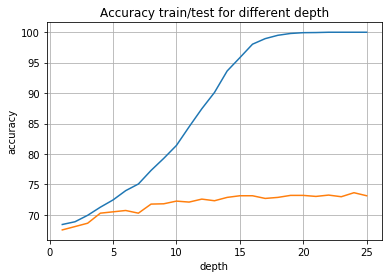

In [96]:
# Proving how our model starts to overfit the trainingdata severely for large depth values,
#without any increase in generalization/accuracy on the "test data"
#for this we don't use cross validation, considering the increasing time complexity and that its mainly for visualisation purposes
train_depth, evaluation_depth = train_test_split(train, test_size = 0.2, random_state = 4)

x_train_depth = train_depth.drop(["target", "Unnamed: 0"], axis = 1)
y_train_depth = train_depth["target"]

x_eval_depth = evaluation_depth.drop(["target", "Unnamed: 0"], axis = 1)
y_eval_depth = evaluation_depth["target"]

max_depths = np.linspace(1, 25, 25, endpoint=True)
train_results = []
eval_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, n_estimators = 150)
    rf.fit(x_train_depth, y_train_depth)
    
    acc_rf = round(rf.score(x_train_depth, y_train_depth) * 100, 2)
    train_results.append(acc_rf)

    acc_rf = round(rf.score(x_eval_depth, y_eval_depth) * 100, 2)
    eval_results.append(acc_rf)
    
from matplotlib.legend_handler import HandlerLine2D
print(train_results)
print(eval_results)
plt.plot(max_depths, train_results)
plt.plot(max_depths, eval_results)
plt.grid()

plt.title("Accuracy train/test for different depth")
plt.xlabel("depth")
plt.ylabel("accuracy")

In [97]:
# Setting all the parameters to be tested as well as initialize the classifier to be used.
clf = RandomForestClassifier()
min_samples_split = [2, 4, 6, 8, 12, 16, 20]
min_samples_leaf = [1, 3, 5, 9, 15, 27]
max_features = ["sqrt", 0.5, 0.7]
n_estimators = [150]
max_depth = [15]
criterion = ["gini"]

#Making a grid of all parameters and use the gridsearchCV to crossvalidate ahe models using all combinations inside the grid
# Printing the params yielding the best accuracy.
param_grid = {"criterion" : criterion, "n_estimators" : n_estimators,
              "max_depth" : max_depth, "min_samples_split" : min_samples_split,
              "min_samples_leaf" : min_samples_leaf, "max_features" : max_features}
clf = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=-1, cv = 5)
clf.fit(x_train, y_train)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 150}

## Testing the model with the best parameters, printing the accuracies and plotting the learning curve

In [98]:
#Testing the model on the hold off test set and printing accuracy, recall and precision as well as the confusion matrix.
#rf = RandomForestClassifier(criterion = "gini", n_estimators = 150, max_depth = 15, max_features = 0.5, min_samples_leaf = 1, min_samples_split = 4)
#rf.fit(x_train, y_train)
predictions = clf.best_estimator_.predict(x_test)
acc_rf = round(clf.best_estimator_.score(x_test, y_test) * 100, 2)
prec_rf = precision_score(y_test, predictions) * 100
recall_rf = recall_score(y_test, predictions) * 100

print("accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", recall_rf)
confusion_matrix(predictions, y_test)

accuracy: 74.06
Precision: 72.68871925360475
Recall: 76.24555160142349


array([[825, 267],
       [322, 857]], dtype=int64)

[learning_curve] Training set sizes: [  72  320  568  816 1064 1312 1560 1808 2056 2304 2552 2800 3048 3296
 3544 3792 4040 4288 4536 4784 5032 5280 5528 5776 6024 6272 6520 6768
 7016 7264]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 10.3min finished


Text(0, 0.5, 'accuracy')

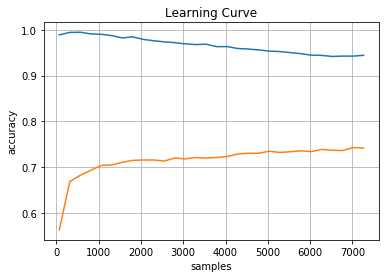

In [53]:
# Preperation for finding the learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, x_train, y_train, cv = 5, scoring = "accuracy", train_sizes = np.linspace(0.01,1,30), verbose = 1)

train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)

#Plotting the learning curve
plt.plot(train_sizes, train_mean, label = 'training score')
plt.plot(train_sizes, test_mean, label = 'cross-validation score')
plt.grid()

plt.title("Learning Curve")
plt.xlabel("samples")
plt.ylabel("accuracy")

## Importances of the different features

In [ ]:
# Plotting the importance of each features for the random forest model
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,4)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)
importances.plot.bar()